# HOMEWORK1

## Read the data

We will dataset is about the house prices in a region in Europe together with the square footage and number of bedroom information denoted by the column (variable) with names sqft and bd respectively. There are n=10 million data points.

In [1]:
options(warn=-1)
houseData <- read.csv('house.csv')

### Inspect the data read

R read the data as dataframe by default so there is no need to convert the "houseData" to datafram.

In [2]:
print(paste("Is houseData a dataframe", is.data.frame(houseData),sep = " "),quote=FALSE)
head(houseData)

[1] Is houseData a dataframe TRUE


X,bd,sqft,price
1,1,1370,451000
2,4,2060,899000
3,4,1738,944000
4,3,1588,715000
5,4,2092,897000
6,3,1456,703000


In [3]:
cat("Size of data frame",dim.data.frame(houseData))

Size of data frame 10000000 4

## Question 1 - Rewrite the objective in the form

In [66]:
y <- as.matrix(houseData$price)
A <- as.matrix(houseData[,2:3])
ones = matrix(rep(1,nrow(y)), nrow = nrow(y), ncol = 1)
print("Price")
head(y)
print("Features")
head(A)

[1] "Price"


451000
899000
944000
715000
897000
703000


[1] "Features"


bd,sqft
1,1370
4,2060
4,1738
3,1588
4,2092
3,1456


### Normalise Data

In [67]:
y <- (y - mean(y))/sd(y)
A[,1] = (A[,1] - mean(A[,1]))/sd(A[,1])
A[,2] = (A[,2] - mean(A[,2]))/sd(A[,2])

print("After Normalization")
print("Price")
head(y)
print("Features")
head(A)

[1] "After Normalization"
[1] "Price"


-1.2490641
1.4362784
1.7060115
0.3333699
1.4242903
0.2614411


[1] "Features"


bd,sqft
-1.3411019,-0.6753744
1.3424687,1.9160003
1.3424687,0.7066921
0.4479452,0.1433498
1.3424687,2.0361800
0.4479452,-0.3523915


#### Complete Data matrix A with ones for intercept

In [68]:
A = cbind(ones,A)
colnames(A)[1] <- "intercept"
head(A)
ncol(A)

intercept,bd,sqft
1,-1.3411019,-0.6753744
1,1.3424687,1.9160003
1,1.3424687,0.7066921
1,0.4479452,0.1433498
1,1.3424687,2.0361800
1,0.4479452,-0.3523915


[1] 3

#### Objective Function in the Matric form with square of L2 Norm

In [69]:
fx <- function(x,y,A){
    return (((norm((y-(A %*% x)), type = "2"))**2)/(2*nrow(A)))
}
##This is sample x row matrix [x1,x2,x3] initialize as zereo
x = matrix(rep(0,ncol(A)),nrow =ncol(A), byrow = TRUE) 
dim(x)

[1] 3 1

## Question 2 - Gradient descent

#### Defination of function for gradient descent and gradient calculation

In [70]:
deltafx <- function(y1,A1,x1){
    yhat <-  A1%*%x1
    diff <- y1 -yhat
    At <- t(A1) 
    df <- -((At%*%diff)/nrow(A1))
    return(df)
}

gradientDescent <- function(y1,A1,x1,alpha,thrs, maxi){
    converged<-FALSE
    i=1
    x1<-x1
    gradientTrend <- c()
     while((!converged  && i <= maxi))
            {
                deltaf <- deltafx(y1,A1,x1)
                if(is.nan(norm(deltaf))){
                    break
                }
                x1 <- x1 - (alpha*deltaf)
                gradientTrend <- append(gradientTrend,norm(deltaf))
                converged <- (norm(deltaf) <= thrs)
                i <- i+1
            }

    return (list("x1"= x1,"gradientTrend" =gradientTrend, "iteration" = i-1,"converged" = converged))
}


In [71]:
#running gradient descent on complete data
alphas <- c(1,0.1)
thres <- 10**(-2)
maxiter <- 10000
A2 <- A
y2 <- y
successalphs <- c()
iternations <- list()
gradienttrend <- list()
xsfull <- list()
x <- matrix(rep(0,ncol(A)),nrow =ncol(A), byrow = TRUE)
row = 1
for (alpha in alphas) {
    answer <- gradientDescent(y,A,x,alpha,thres,maxiter)
        if (answer$converged){
        successalphs <- append(successalphs,alpha)
        xsfull[[row]] <- answer$x
        iternations[[row]] <- answer$iteration
        gradienttrend[[row]] <- answer$gradientTrend
        row = row+1
    }
    }
successalphs <- format(successalphs, scientific = FALSE)
xsfull <- do.call(cbind, xsfull)
iternations <- do.call(cbind, iternations)

colnames(xsfull)<- successalphs
colnames(iternations)<- successalphs
modifiedxs <- format(xsfull, scientific = FALSE)
modifiedxs
iternations
successalphs

,1.0,0.1
intercept,0.00000000000000007827117,0.00000000000000008478084
bd,0.67149730071657520724671,0.63946203261536271877929
sqft,0.32223947593443569292759,0.34988143845254865427208


1.0,0.1
31,108


[1] "1.0" "0.1"

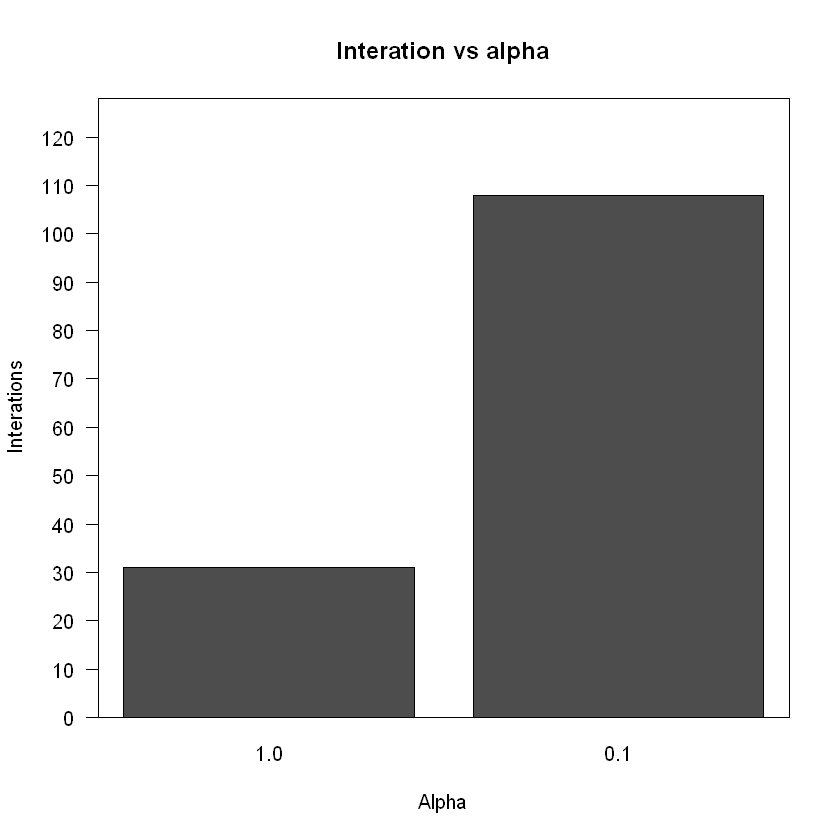

In [72]:
barplot(iternations, main="Interation vs alpha", names.arg = successalphs,
        ylab = "Interations", ylim = c(0,max(iternations)+20), xlab = "Alpha", axes = FALSE)
ylabel <- seq(0, max(iternations)+20, by = max(iternations)%/%10)
axis(2, at = ylabel, las = 1)
box()

#### Running gradient descent for varoius values of alpha with less no. number of rows

In [73]:
alphas <- c(10,1,0.1,0.01,0.005,0.002,0.0015,0.0010,0.0008,0.0006,0.0004,0.0002,0.0001)
thres <- 10**(-2)
maxiter <- 10000
#considering first 1000 rows 
A2 <- A[1:1000,]
y2 <- matrix(y[1:1000,],nrow=1000,byrow=TRUE)

successalphs <- c()
iternations <- list()
gradienttrend <- list()
xs <- list()
row = 1 

for (alpha in alphas)
    {
        x <- matrix(rep(0,ncol(A)),nrow =ncol(A), byrow = TRUE)
        answer <- gradientDescent(y2,A2,x,alpha,thres,maxiter)
        if (answer$converged){
            successalphs <- append(successalphs,alpha)
            xs[[row]] <- answer$x
            iternations[[row]] <- answer$iteration
            gradienttrend[[row]] <- answer$gradientTrend
            row = row+1
        }
    }
successalphs <- format(successalphs, scientific = FALSE)
xs <- do.call(cbind, xs)
iternations <- do.call(cbind, iternations)

colnames(xs)<- successalphs
colnames(iternations)<- successalphs
xs
iternations
successalphs

,1.0000,0.1000,0.0100,0.0050,0.0020,0.0015
intercept,-0.009055142,-0.01009188,-0.01010718,-0.01010849,-0.0101090,-0.0101090
bd,0.673877865,0.64525086,0.64470173,0.64465470,0.6446364,0.6446367
sqft,0.301272612,0.33363521,0.33417774,0.33422421,0.3342423,0.3342420


1.0000,0.1000,0.0100,0.0050,0.0020,0.0015
36,115,1147,2293,5732,7643


[1] "1.0000" "0.1000" "0.0100" "0.0050" "0.0020" "0.0015"

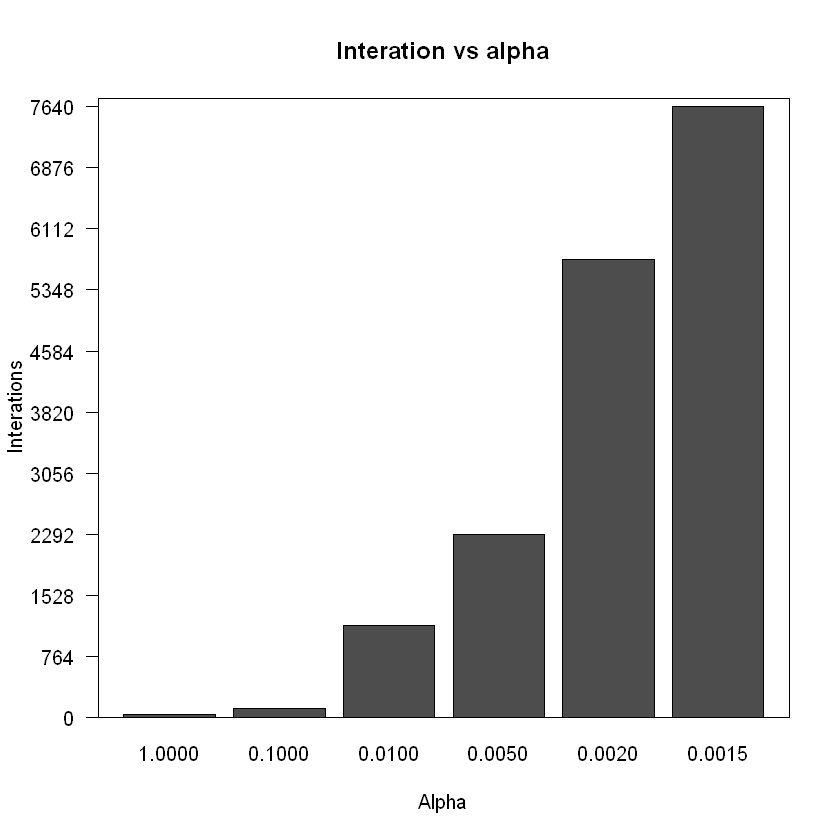

In [74]:
barplot(iternations, main="Interation vs alpha", names.arg = successalphs,
        ylab = "Interations", ylim = c(0,max(iternations)+100), xlab = "Alpha", axes = FALSE)
ylabel <- seq(0, max(iternations)+100, by = max(iternations)%/%10)
axis(2, at = ylabel, las = 1)
box()

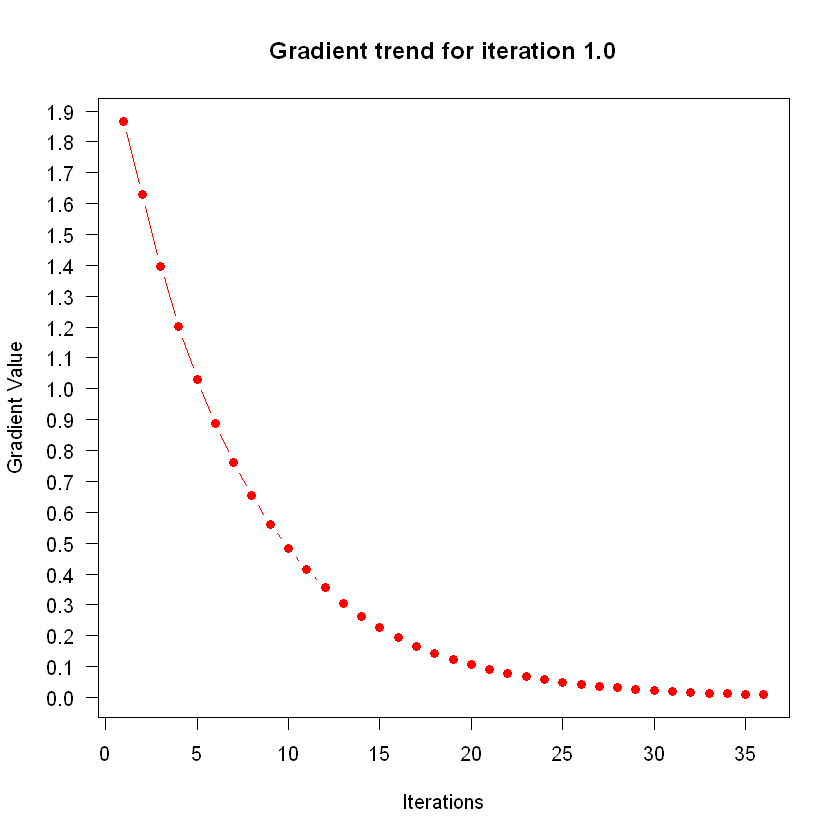

In [75]:
## Plot of gradient trend for best alpha
plot(gradienttrend[[which('1.0000' == successalphs)]], type = "b", main="Gradient trend for iteration 1.0", pch = 19, 
     col = "red", xlab = "Iterations", ylab = "Gradient Value", axes = FALSE)
ylabel <- seq(0, 2, by = 0.1)
xlabel <- seq(0, 70, by = 5)
axis(1, at = xlabel, las = 1)
axis(2, at = ylabel, las = 1)
box()

#### Actual Solution by solving linear equations

In [76]:
sol <- solve((t(A)%*%A))%*%(t(A)%*%y)
modifiedsol <- format(sol, scientific = FALSE)
modifiedsol

intercept,0.0000000000000001016019
bd,0.6700795745981675821668
sqft,0.3192638967577376973850


#### Calculating difference between actual solution and solutions obtained for various value of alphas for full data

In [77]:
as <- apply(xsfull,2,function(x) sol -x)
as <- format(as, scientific = FALSE)
as

1.0,0.1
0.00000000000000002333068,0.00000000000000001682101
-0.00141772611840762507995,0.03061754198280486338746
-0.00297557917669799554261,-0.03061754169481095688710


#### Conclusion

For complete dataset algorithm converge for values of alpha = 1 with 31 iterations  and alpha = 0.1 with 108 iterations 

Multiple alphas
Gradient descent was run for alphas = [1,0.1,0.01,0.005,0.002,0.0015,0.001,0.0008,0.0006,0.0004,0.0002,0.0001] There was no convergence for alpha greater than 1. Algorithm converged for alphas [1,0.1,0.01,0.005,0.002,0.0015] with in 10,000 internations, with minimum interations 36  for alpha = 1.

Also there is negligible difference between solutions using gradient descent and actual solutions. 


## Question 3 - Plot Contour plot with movement of gradient descent and cost function for two features with 3rd kept as constant 

#### Generating random values for x2 and x3 while keeping x1 to optimum value 

In [78]:
#random values are generated and arranged in a matrix to feed to cost function

xrange2 <- seq(from = sol[2]*(0.5),to = sol[2]*(1.5), length.out = 50)
xrange3 <- seq(from = sol[3]*(0.5),to = sol[3]*(1.5), length.out = 50)
xr2 = rep(xrange2,length(xrange2))
xr1 <- rep(sol[1],length(xr2))
xr3 = c()
for(i in xrange3){
list = rep(i,length(xrange3))
xr3 = append(xr3,list)
}
xrandom = cbind(xr1,xr2,xr3)
head(xrandom)

xr1,xr2,xr3
1.016019e-16,0.3350398,0.1596319
1.016019e-16,0.3487149,0.1596319
1.016019e-16,0.3623900,0.1596319
1.016019e-16,0.3760651,0.1596319
1.016019e-16,0.3897402,0.1596319
1.016019e-16,0.4034153,0.1596319


####  Solving fx (cost function) for xrandom 

In [81]:
fxValues <- c()
for (i in seq(1,nrow(xrandom))){
    xi <- as.matrix(xrandom[i,], nrow = 3)
    fxValues[i]<-fx(xi,y,A)
}
fxValues <- matrix(fxValues,nrow = length(xrange2),ncol = length(xrange3) )
dim(fxValues)
head(fxValues)

[1] 50 50

0.1586738,0.1558219,0.1530125,0.1502456,0.1475211,0.1448390,0.1421994,0.1396023,0.1370476,0.1345353,...,0.07771249,0.07655874,0.07544745,0.07437861,0.07335222,0.07236828,0.07142679,0.07052776,0.06967119,0.06885706
0.1523526,0.1495756,0.1468410,0.1441488,0.1414991,0.1388919,0.1363271,0.1338048,0.1313249,0.1288875,...,0.07438395,0.07330501,0.07226853,0.07127451,0.07032293,0.06941381,0.06854715,0.06772293,0.06694117,0.06620186
0.1462184,0.1435162,0.1408564,0.1382391,0.1356642,0.1331318,0.1306418,0.1281943,0.1257893,0.1234267,...,0.07124241,0.07023829,0.06927663,0.06835742,0.06748066,0.06664636,0.06585450,0.06510511,0.06439816,0.06373367
0.1402713,0.1376438,0.1350589,0.1325164,0.1300163,0.1275587,0.1251436,0.1227709,0.1204406,0.1181528,...,0.06828788,0.06735858,0.06647173,0.06562734,0.06482540,0.06406591,0.06334887,0.06267429,0.06204216,0.06145248
0.1345111,0.1319585,0.1294484,0.1269807,0.1245554,0.1221726,0.1198323,0.1175344,0.1152790,0.1130660,...,0.06552036,0.06466587,0.06385384,0.06308426,0.06235714,0.06167247,0.06103025,0.06043048,0.05987317,0.05935831
0.1289379,0.1264602,0.1240248,0.1216319,0.1192815,0.1169735,0.1147080,0.1124850,0.1103043,0.1081662,...,0.06293984,0.06216018,0.06142296,0.06072820,0.06007589,0.05946603,0.05889863,0.05837368,0.05789118,0.05745114


#### Gradient descent is for with x1 kept at its optimum values.

In [22]:
#storing xs for ploting 
gradX <- list()

x2 <- matrix(c(sol[1],0,0),nrow =ncol(A), byrow = TRUE)
thres <- 10**(-2)
converged<-FALSE
maxi <- 100
gradX[[1]] <- x2
i=2
alpha = 1
gradientTrend <- c()
 while((!converged  && i <= maxi))
        {
            deltaf <- deltafx(y,A,x2)
            if(is.nan(norm(deltaf))){
                break
            }
            x2 <- x2 - (alpha*deltaf)
            # x1(inside column matrix x2) is changed to optimum value  
            x2[1] = sol[1] 
            gradX[[i]] <- x2
            gradientTrend <- append(gradientTrend,norm(deltaf))
            converged <- (norm(deltaf) <= thres)
            i <- i+1
        }
#creating matrix of solution of xs to plot direction of gradient 
mgradX <- do.call(cbind, gradX)
tmgradX <- t(mgradX)
head(tmgradX)

xe2 <- tmgradX[,2]
xe3 <- tmgradX[,3]

intercept,bd,sqft
1.016019e-16,0.0000000,0.00000000
1.016019e-16,0.9381574,0.88191285
1.016019e-16,0.1976374,0.09416576
1.016019e-16,0.8590888,0.71596169
1.016019e-16,0.3369824,0.16055765
1.016019e-16,0.8033412,0.59895719


#### Contour plot with Gradient Flow 

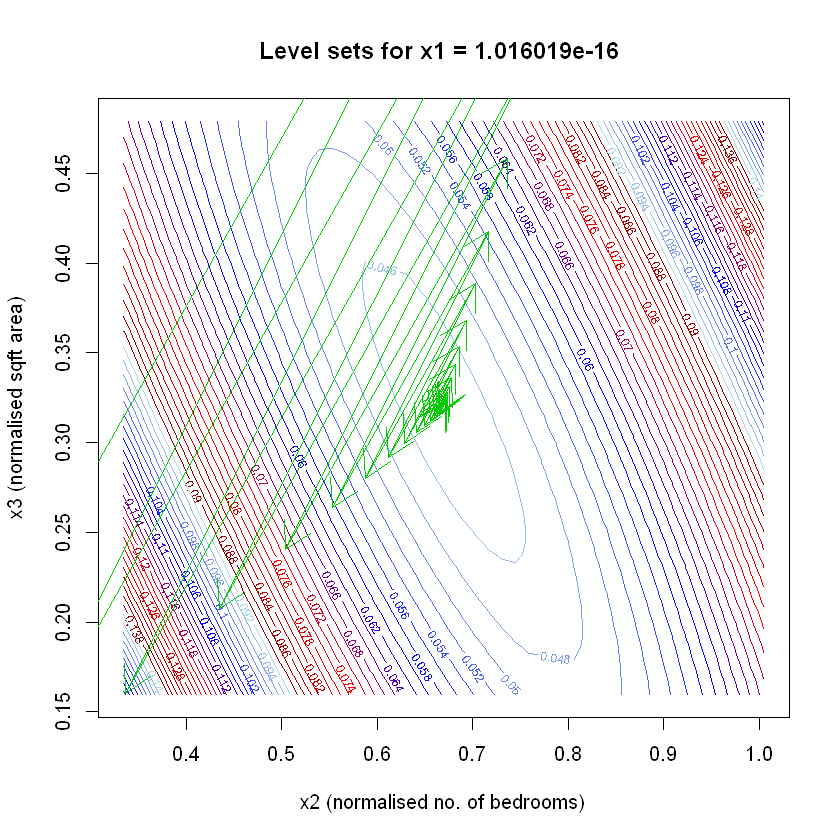

In [23]:
cols = rev(colorRampPalette(c('darkred','red','blue','lightblue'))(24))
contour(xrange2,xrange3,z = fxValues,nlevels = 80, main = "Level sets for x1 = 1.016019e-16 ", xlab = "x2 (normalised no. of bedrooms)", ylab = "x3 (normalised sqft area)",col = cols)
s <- seq(length(xe2)-1)
arrows(xe2[s], xe3[s], xe2[s+1], xe3[s+1], col = 3)

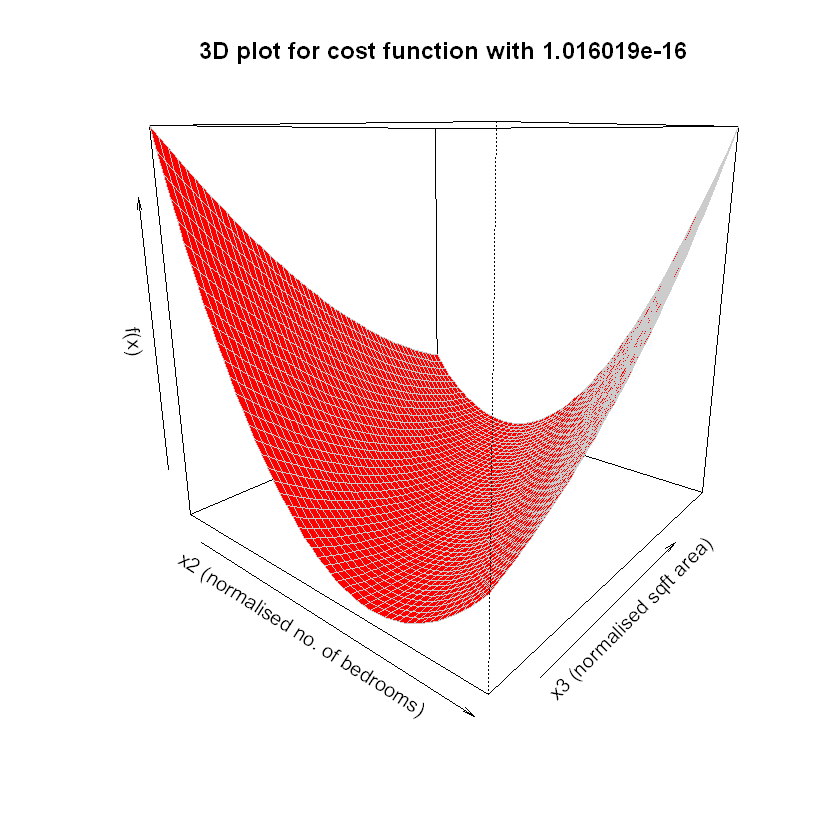

In [24]:
persp(xrange2,xrange3,fxValues, theta = 40,main = "3D plot for cost function with 1.016019e-16", xlab = "x2 (normalised no. of bedrooms)", ylab = "x3 (normalised sqft area)",zlab = "f(x)" , 
      col="red", border="grey80" )

#### As graph is not perfect cereal bowl shape to inspect the possible reason coorelation is calculated b/w "bd" and "sqft". Thus same thing will be present in their solution and range aroung it

In [123]:
cor(c(A[,2]), c(A[,3]), use="complete.obs", method="pearson")

[1] 0.839675

#### Conclusion

Level set is plotted for a range of x2 and x3 with x1 kept at optimum it is observed that gradient to flow perpendicular to level sets and as visibile in the plot gradient jumped around a lot before converging to minima. For even though not shown in code 3 iterartion were done one with x = [0,0,0], one with x started with = [x1*,0.0] and final one shown in code where x1 is kept x1* for complete gradient process

3D plot is not perfect cereal bowl shape possible reason for this high coorelation between two features of the dataset as indicated indicated by correlation factor  0.839674958214801

## Question 4 -Repeat the previous question with different choise of the stepsize alpha in your implementation

# Conclusion for part a) 

Expanding on the analysis done for Question 2, starting with alpha = 10  we moved to alpha = 0.0001 and for higher alpha there was no convergence. Convergence started with alpha = 1 with minimum no. of iterations for alpha = 1.

For this problem any alpha greater than 1 will lead to divergence.   

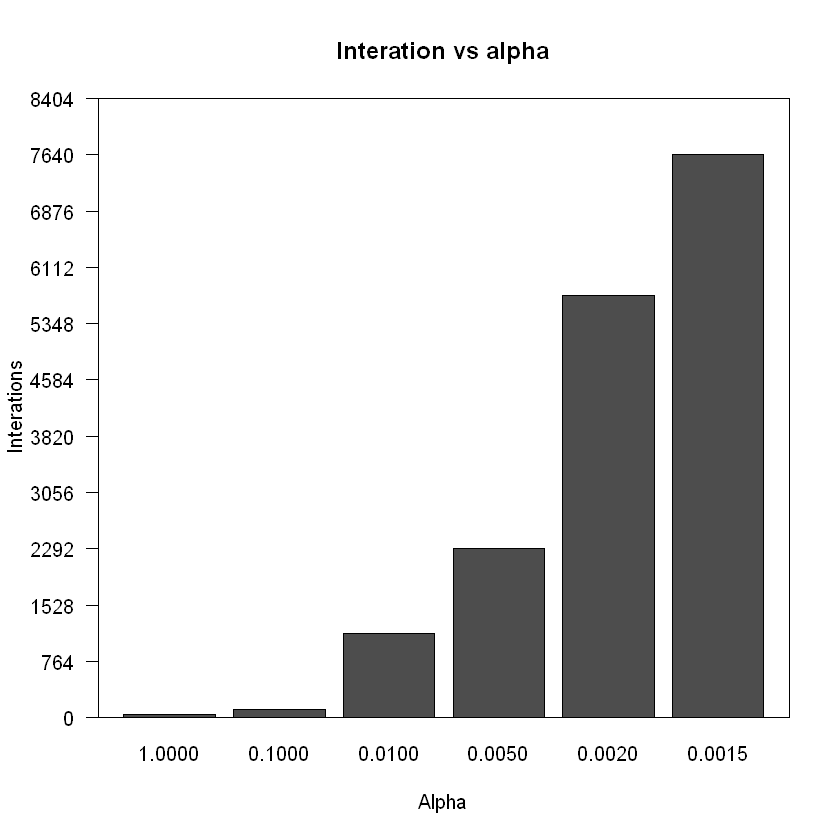

In [38]:
barplot(iternations, main="Interation vs alpha", names.arg = successalphs,
        ylab = "Interations", ylim = c(0,max(iternations)+max(iternations)%/%10), xlab = "Alpha", axes = FALSE)
ylabel <- seq(0, max(iternations)+max(iternations)%/%10, by = max(iternations)%/%10)
axis(2, at = ylabel, las = 1)
box()

In [39]:
gradientDescent2 <- function(y1,A1,x1,advalpha,thrs, maxi, option){
    converged<-FALSE
    i=1
    x1<-x1
    gradientTrend <- c()
    alpha <- advalpha
     while((!converged  && i <= maxi))
            {
                deltaf <- deltafx(y1,A1,x1)
                if(is.nan(norm(deltaf))){
                    break
                }
         
                #option for alpha 
                if (option == 1)
                    {
                    alpha <- advalpha/i
                } else if (option == 2) 
                    {
                    alpha <- advalpha/sqrt(i)
                }
                x1 <- x1 - (alpha*deltaf)
                gradientTrend <- append(gradientTrend,norm(deltaf))
                converged <- (norm(deltaf) <= thrs)
                i <- i+1
            }

    return (list("x1"= x1,"gradientTrend" =gradientTrend, "iteration" = i-1,"converged" = converged, "alpha" = alpha ))
}

In [43]:
gdwithadpstep <- function(alphas,opt){  
    thres <- 10**(-2)
    maxiter <- 10000
    #considering first 1000 rows as complete data set takes lot of time this many iterations
    A3 <- A[1:1000,]
    y3 <- matrix(y[1:1000,],nrow=1000,byrow=TRUE)
    successalphs <- c()
    finalalphs <- list()
    iternations <- list()
    gradienttrend <- list()
    xs <- list()
    row = 1 

    for (alpha in alphas)
        {
            x <- matrix(rep(0,ncol(A)),nrow =ncol(A), byrow = TRUE)
            answer <- gradientDescent2(y3,A3,x,alpha,thres,maxiter,opt)
            if (answer$converged){
                successalphs <- append(successalphs,alpha)
                finalalphs[[row]] <- answer$alpha
                xs[[row]] <- answer$x
                iternations[[row]] <- answer$iteration
                gradienttrend[[row]] <- answer$gradientTrend
                }
                row = row+1
        }

    if (is.null(successalphs))
        {
        print("Convergence not achived")
    }else {
        successalphs <- format(successalphs, scientific = FALSE)
        xs <- do.call(cbind, xs)
        iternations <- do.call(cbind, iternations)
        finalalphs <- do.call(cbind, finalalphs)
        colnames(xs)<- successalphs
        colnames(iternations)<- successalphs
        colnames(finalalphs)<- successalphs
        as <- apply(xs,2,function(x) sol -x)
        as <- format(as, scientific = FALSE)
        print(as)
        barplot(iternations, main="Interation vs alpha", names.arg = successalphs,
        ylab = "Interations", ylim = c(0,max(iternations)+10), xlab = "Alpha", axes = FALSE) 
        ylabel <- seq(0, max(iternations)+10, by = max(iternations)%/%10)
        axis(2, at = ylabel, las = 1)
        box()
    }
}

     10            
[1,] " 0.009205546"
[2,] "-0.006607395"
[3,] " 0.016984225"
     10.0           1.0           0.1         
[1,] " 0.01001283" " 0.01006655" " 0.01010885"
[2,] " 0.02197309" " 0.02391818" " 0.02543807"
[3,] "-0.01154990" "-0.01347169" "-0.01497336"


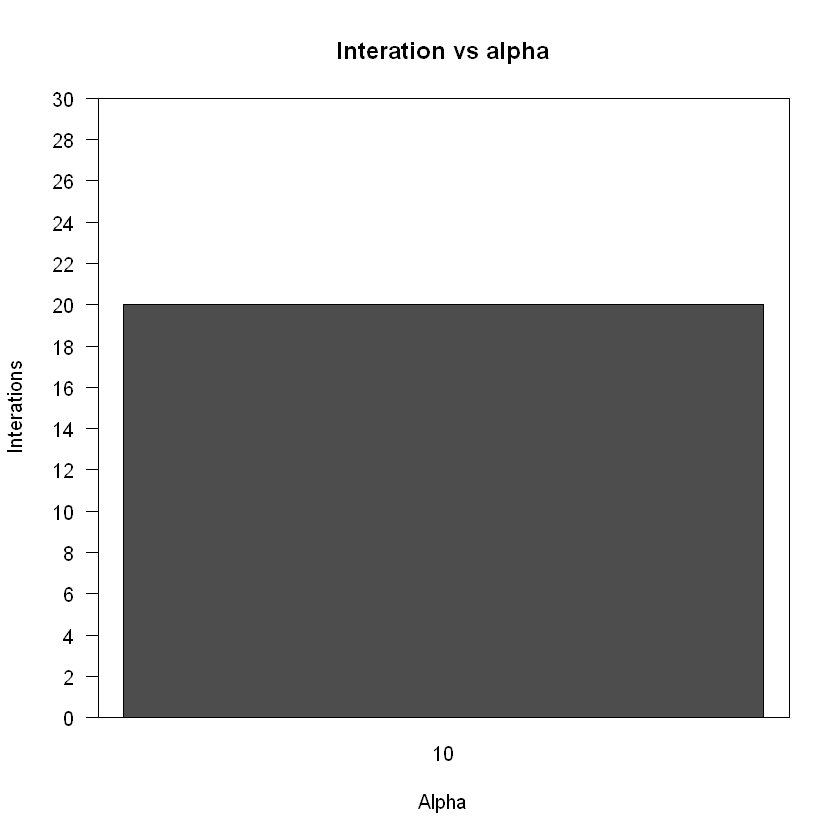

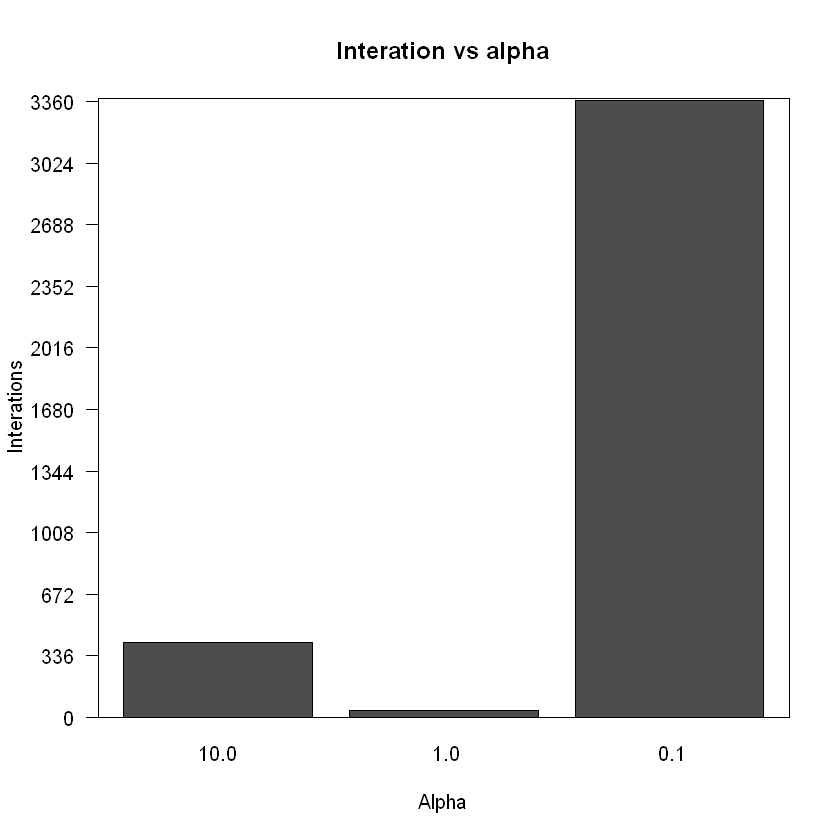

In [45]:
alphas <- c(10,1,0.1,0.01,0.0010)
options <- c(1,2)
for (opt in options)
{
    gdwithadpstep(alphas,opt)
}
    


# Conclusion for part b) and c) 

Use both the method of adaptive step size for data(limited to 1000 rows) it can be concluded on the basis of graphs above (first is for alpha = a/i and second is for alpha = a/sqrt(i)) first method with work well for high starting learning rate and it will converge in less iterations but it won't provide convergence for lower starting learning rate as alpha will drop to zero very quickly. 

Second method provide convergence for smaller learning rates giving chance to better solutions . Though both the approches have same similar difference from solution by solving linear equations.  

## Question 5 - Stochastic Gradient Method

In [16]:
stochasticGradientDes <- function(y1,A1,x1,advalpha,thrs, maxi, option){
    converged<-FALSE
    i=1
    x1<-x1
    gradientTrend <- c()
    alpha <- advalpha
     while((!converged  && i <= maxi))
            {
                index <- sample(nrow(A1),1)
                yi <- matrix(y1[index],nrow = 1,byrow = TRUE)
                Ai <- matrix(A1[index,],nrow = 1,byrow = TRUE) 
                deltaf <- deltafx(yi,Ai,x1)
                if(is.nan(norm(deltaf))){
                    break
                }
         
                #option for alpha 
                if (option == 1)
                    {
                    alpha <- advalpha
                } else if (option == 2) 
                    {
                    alpha <- advalpha/i
                } else if (option == 3) 
                    {
                    alpha <- advalpha/sqrt(i)
                }
         
                x1 <- x1 - (alpha*deltaf)
                gradientTrend <- append(gradientTrend,norm(deltaf))
                converged <- (norm(deltaf) <= thrs)
                i <- i+1
            }

    return (list("x1"= x1,"gradientTrend" =gradientTrend, "iteration" = i-1,"converged" = converged, "alpha" = alpha ))
}

In [23]:
# Stochastic Gradient on complete data for alpha = 1 and 0.1
alphas <- c(1,0.1,0.01)
thres <- 10**(-2)
maxiter <- 1000
A2 <- A
y2 <- y
successalphs <- c()
iternations <- list()
gradienttrend <- list()
xsfull <- list()
x <- matrix(rep(0,ncol(A)),nrow =ncol(A), byrow = TRUE)
row = 1
for (alpha in alphas) {
    answer <- stochasticGradientDes(y,A,x,alpha,thres,maxiter,1)
        if (answer$converged){
        successalphs <- append(successalphs,alpha)
        xsfull[[row]] <- answer$x
        iternations[[row]] <- answer$iteration
        gradienttrend[[row]] <- answer$gradientTrend
        row = row+1
    }
    }
successalphs <- format(successalphs, scientific = FALSE)
xsfull <- do.call(cbind, xsfull)
iternations <- do.call(cbind, iternations)

colnames(xsfull)<- successalphs
colnames(iternations)<- successalphs
modifiedxs <- format(xsfull, scientific = FALSE)
modifiedxs
iternations
successalphs

0.10,0.01
0.026916195,0.004764189
0.538005611,0.521706534
0.415810632,0.405792914


0.10,0.01
64,217


[1] "0.10" "0.01"

### Observation on SGD

It is fast compare to normal GD, but it doesn't guarantee same solution in each iteration or as a matter of fact best solution. Above I ran SGD for three alphas out of which it converged for two but the interation and solution is different in each run, this will be shown in the next section.

In [38]:
alpha <- 0.1
thres <- 10**(-2)
maxiter <- 1000
A2 <- A
y2 <- y
Siternations <- list()
Sgradienttrend <- list()
Sxsfull <- list()
x <- matrix(rep(0,ncol(A)),nrow =ncol(A), byrow = TRUE)
row = 1
for (i in seq(1,5,1)) {
    answer <- stochasticGradientDes(y,A,x,alpha,thres,maxiter,1)
        if (answer$converged){
        Sxsfull[[row]] <- answer$x
        Siternations[[row]] <- answer$iteration
        Sgradienttrend[[row]] <- answer$gradientTrend
        row = row+1
    }
    }
Sxsfull <- do.call(cbind, Sxsfull)
Siternations <- do.call(cbind, Siternations)

colnames(Sxsfull)<- seq(1,5,1)
colnames(Siternations)<- seq(1,5,1)
modifiedxs <- format(Sxsfull, scientific = FALSE)
modifiedxs
Siternations

1,2,3,4,5
-0.017651936,0.006640093,0.075477447,0.005380836,0.044466205
0.810941528,0.486160311,0.707340578,0.650536353,0.556324112
0.462324871,0.388821118,0.330708252,0.305325255,0.348899485


1,2,3,4,5
110,31,172,145,56


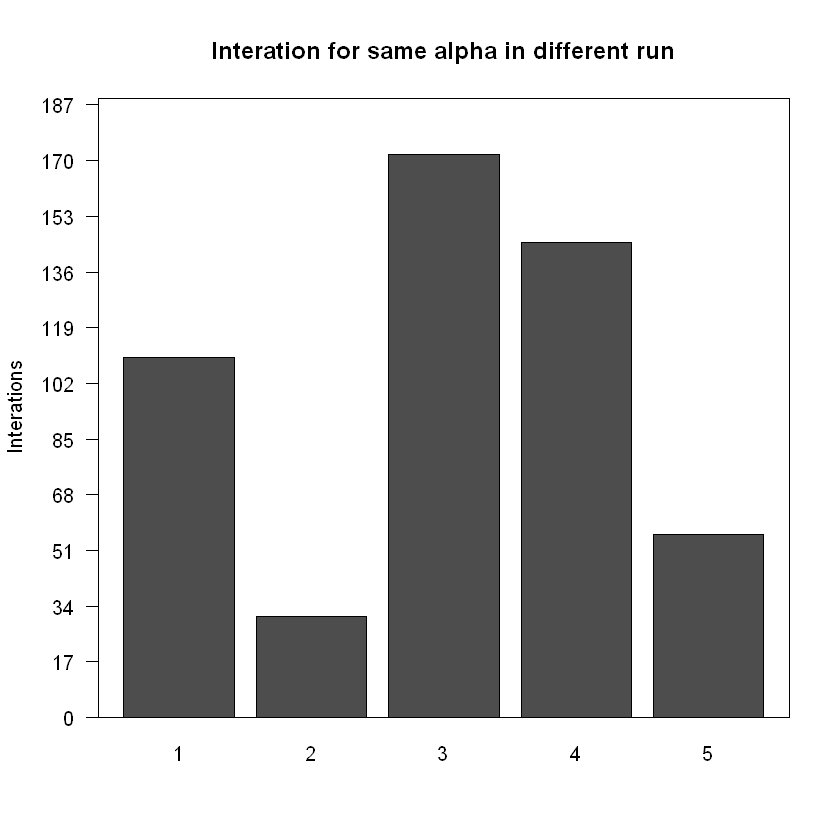

In [39]:
barplot(Siternations, main="Interation for same alpha in different run", names.arg = seq(1,5,1),
        ylab = "Interations", ylim = c(0,max(Siternations)+max(Siternations)%/%10), xlab = "", axes = FALSE)
ylabel <- seq(0, max(Siternations)+max(Siternations)%/%10, by = max(Siternations)%/%10)
axis(2, at = ylabel, las = 1)
box()

In [40]:
as <- apply(Sxsfull,2,function(x) sol -x)
as <- format(as, scientific = FALSE)
as

1,2,3,4,5
0.017651936,-0.006640093,-0.075477447,-0.005380836,-0.044466205
-0.140861953,0.183919264,-0.037261003,0.019543222,0.113755462
-0.143060974,-0.069557222,-0.011444355,0.013938642,-0.029635588


#### SGD for Adaptive Step Size 

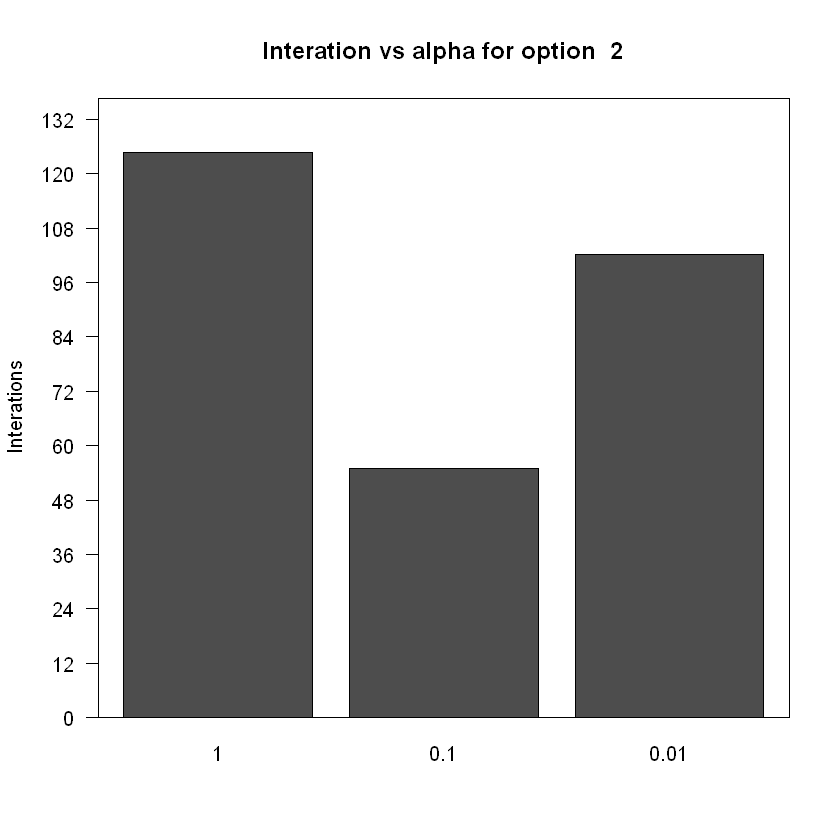

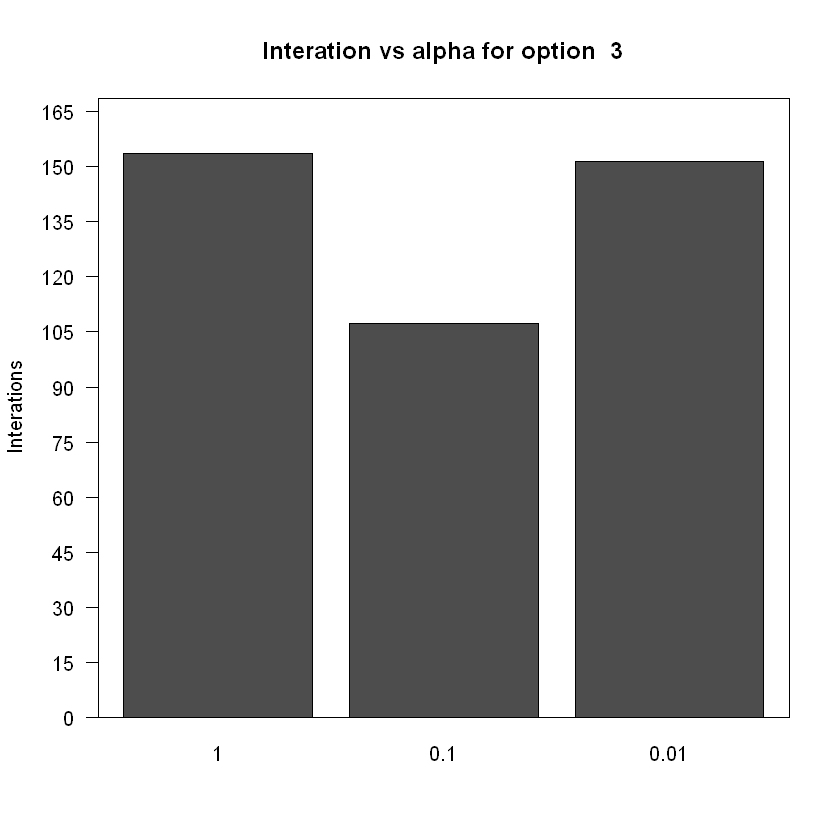

In [53]:
options <- c(2,3)
for (opt in options){
    alphas <- c(1,0.1,0.01)
    thres <- 10**(-2)
    Siternations <- list()
    Ssuccessalphs <- c()
    x <- matrix(rep(0,ncol(A)),nrow =ncol(A), byrow = TRUE)
    row = 1
    for (alpha in alphas) {
        iterationcount <- c()
        for (i in seq(1,5,1))
            {    
                answer <- stochasticGradientDes(y,A,x,alpha,thres,maxiter,opt)
                if (answer$converged){ 
                    
                iterationcount = append(iterationcount,answer$iteration)
                    
                }
            
        }
            Ssuccessalphs <- append(Ssuccessalphs,alpha)
            Siternations[[row]] <- mean(iterationcount)
            row = row+1
    }
    Siternations <- do.call(cbind, Siternations)
    colnames(Siternations)<- Ssuccessalphs
    
    barplot(Siternations, main= paste("Interation vs alpha for option ", opt,sep = " "), names.arg = Ssuccessalphs,
        ylab = "Interations", ylim = c(0,max(Siternations)+max(Siternations)%/%10), xlab = "", axes = FALSE)
ylabel <- seq(0, max(Siternations)+max(Siternations)%/%10, by = max(Siternations)%/%10)
axis(2, at = ylabel, las = 1)
box()
}

### Observation on SGD

It is quite difficult to draw any conclusion for adaptive alpha for SGD as each iteration gives different result. So I ran 5 iteration for each and capture mean no. of iteration for each. It is obserable that option 2 (alpha = a/i) gives answer in less number of iteration.  

#### SGD for different threshold

     0.1           0.01         
[1,] " 0.09177923" "-0.01031580"
[2,] " 0.48341586" " 0.28323165"
[3,] " 0.54253265" " 0.26235312"
     0.1           0.01         
[1,] "-0.09717073" "-0.01137831"
[2,] " 0.59742232" " 0.47059362"
[3,] " 0.47486920" " 0.40409319"


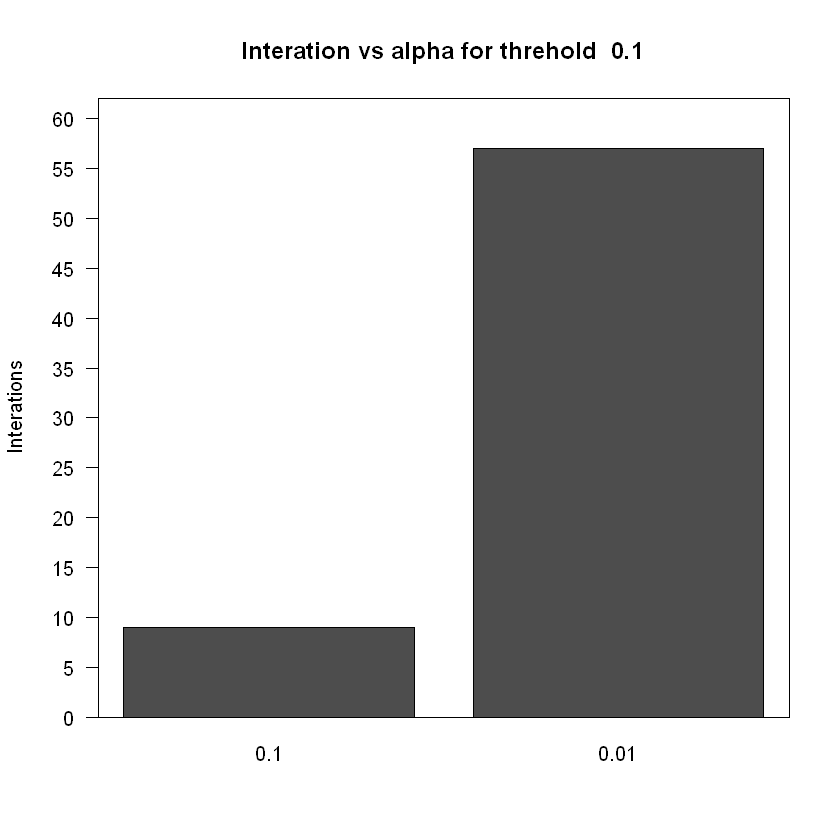

     0.1          0.01        
[1,] "0.04992134" "0.05477428"
[2,] "0.66553418" "0.44618333"
[3,] "0.52556511" "0.37517108"


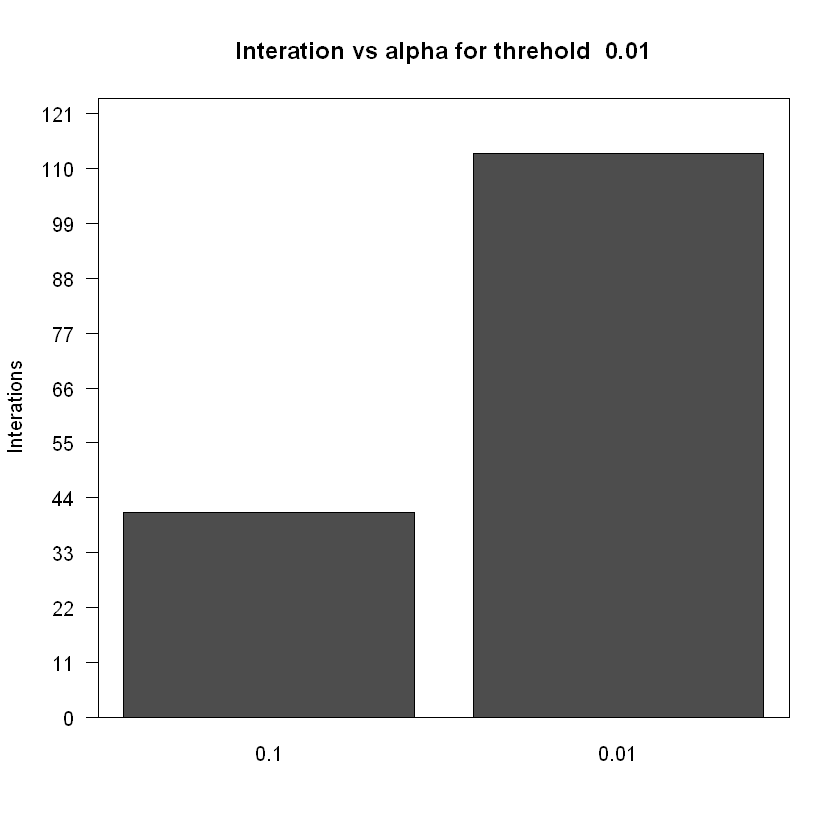

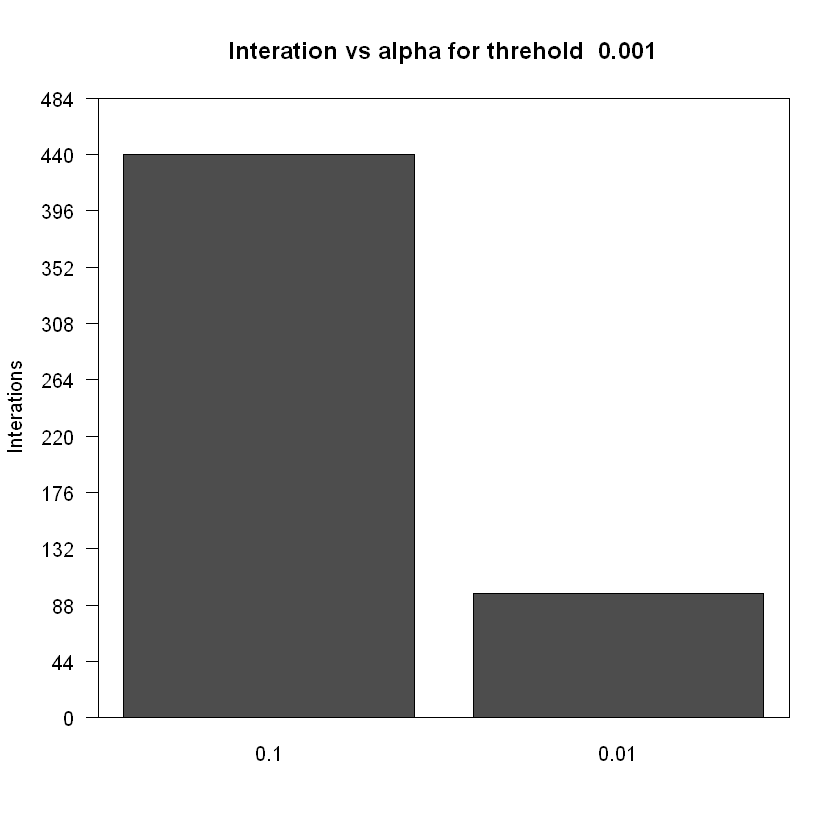

In [65]:
thres <- c(10**(-1),10**(-2),10**(-3))
for (thre in thres){
    maxiter <- 1000
    alphas <- c(0.1,0.01)
    A2 <- A
    y2 <- y
    Siternations <- list()
    Ssuccessalphs <- c()
    Sgradienttrend <- list()
    Sxsfull <- list()
    x <- matrix(rep(0,ncol(A)),nrow =ncol(A), byrow = TRUE)
    row = 1
    for (alpha in alphas) {
        answer <- stochasticGradientDes(y,A,x,alpha,thre,maxiter,1)
            if (answer$converged){
                Ssuccessalphs <- append(Ssuccessalphs,alpha)
                Sxsfull[[row]] <- answer$x
                Siternations[[row]] <- answer$iteration
                Sgradienttrend[[row]] <- answer$gradientTrend
                row = row+1
            }
        }
    Sxsfull <- do.call(cbind, Sxsfull)
    Siternations <- do.call(cbind, Siternations)

    colnames(Sxsfull)<- Ssuccessalphs
    colnames(Siternations)<- Ssuccessalphs
    modifiedxs <- format(Sxsfull, scientific = FALSE)
    print(modifiedxs)

        barplot(Siternations, main= paste("Interation vs alpha for threhold ", thre,sep = " "), names.arg = Ssuccessalphs,
            ylab = "Interations", ylim = c(0,max(Siternations)+max(Siternations)%/%10), xlab = "", axes = FALSE)
    ylabel <- seq(0, max(Siternations)+max(Siternations)%/%10, by = max(Siternations)%/%10)
    axis(2, at = ylabel, las = 1)
    box()
}

### Observation on SGD

as threshold decreases no. of iteration increases which is resonable as are aiming for more accurate solution 

### Contour Plot for the SGD

In [129]:
#storing xs for ploting stochastic gradient flow
SgradX <- list()

sx <- matrix(c(sol[1],0,0),nrow =ncol(A), byrow = TRUE)
thres <- 10**(-2)
converged<-FALSE
maxi <- 1000
SgradX[[1]] <- sx
i=2
alpha = 0.01
gradientTrend <- c()
 while((!converged  && i <= maxi))
        {
            index <- sample(nrow(A),1)
            yi <- matrix(y[index],nrow = 1,byrow = TRUE)
            Ai <- matrix(A[index,],nrow = 1,byrow = TRUE) 
            deltaf <- deltafx(yi,Ai,sx)
            if(is.nan(norm(deltaf))){
                break
            }
            sx <- sx - (alpha*deltaf)
            # x1(inside column matrix x2) is changed to optimum value  
            sx[1] = sol[1] 
            SgradX[[i]] <- sx
            gradientTrend <- append(gradientTrend,norm(deltaf))
            converged <- (norm(deltaf) <= thres)
            i <- i+1
        }
#creating matrix of solution of xs to plot direction of gradient 
mSgradX <- do.call(cbind, SgradX)
tmSgradX <- t(mSgradX)
tail(tmSgradX)
nrow(tmSgradX)

sxe2 <- tmSgradX[,2]
sxe3 <- tmSgradX[,3]

"[195,]",1.016019e-16,0.5448748,0.4371755
"[196,]",1.016019e-16,0.5478437,0.4353875
"[197,]",1.016019e-16,0.5481899,0.4357411
"[198,]",1.016019e-16,0.5494029,0.4388509
"[199,]",1.016019e-16,0.5499848,0.4402861
"[200,]",1.016019e-16,0.5499669,0.4402532


[1] 200

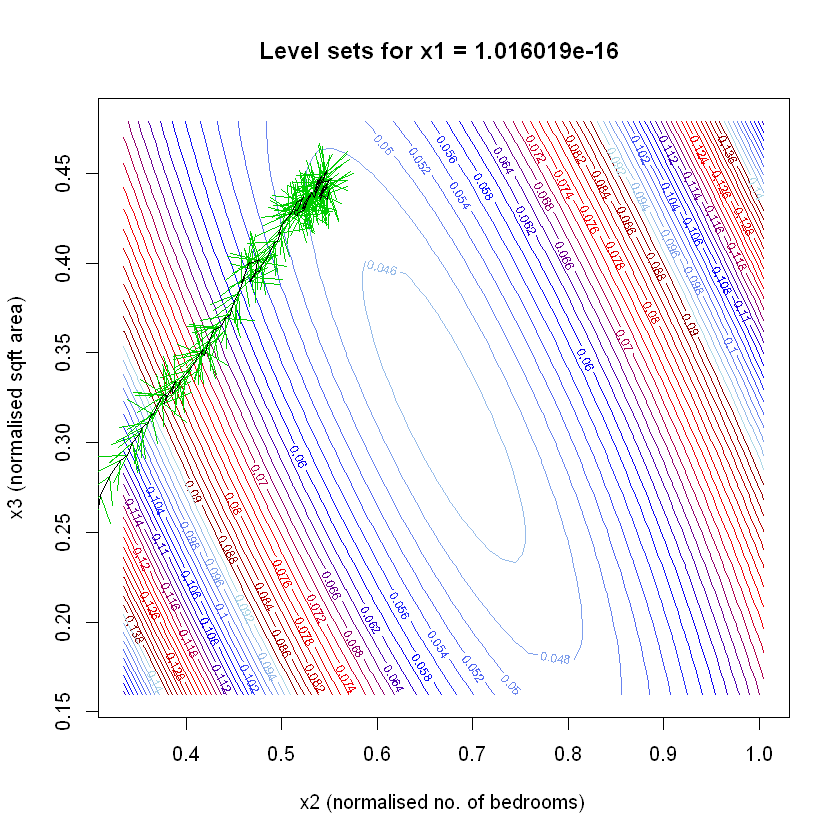

In [130]:
#For contour plot formalation from question 3 is used as there won't be any change in contour plot for problem 
cols = rev(colorRampPalette(c('darkred','red','blue','lightblue'))(24))
contour(xrange2,xrange3,z = fxValues,nlevels = 80, main = "Level sets for x1 = 1.016019e-16 ", xlab = "x2 (normalised no. of bedrooms)", ylab = "x3 (normalised sqft area)",col = cols)
s <- seq(length(sxe3)-1)
arrows(sxe2[s], sxe3[s], sxe2[s+1], sxe3[s+1], col = 3)
lines(sxe2,sxe3)

### Observation on SGD

Here I have kept the contoure plot for one of "nicer" runn of SGD as there were some run where SGD converges even before coming anywhere near the optimal solution.

Gradient flow for SGD is random, though it has aim for value less than thresold but since with every itreration we are using differernt value of gradient it may converges to some what sub optimal solution. This may be good for  problems where even a sub optimal solution will be good enough  

Github link for the code 

https://github.com/jainsanyam786/OptimizationForMachineLearning.git